# Imports

In [87]:
import pandas as pd
import polars as pl
import pyreadstat
import missingno as msgo

import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [60]:
# Why I choosing the level 07 
# As you mention this we need to Understand the user food, health and finance background

In [61]:
lev_07_path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-07\data\lev-07_merged.parquet"
df = pd.read_parquet(lev_07_path)
pdf = pl.read_parquet(lev_07_path)

# Total vs MP

In [62]:
print(f"Toatl record present in Level 07 dataset {pdf.shape[0]}")

Toatl record present in Level 07 dataset 523906


In [63]:
mp_data = df[df['State'] == '23']

print(f"Total Madhya Pradesh data present in this Level 07 Dataset: {mp_data.shape[0]}")

Total Madhya Pradesh data present in this Level 07 Dataset: 28210


In [64]:
mp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28210 entries, 21320 to 523709
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Survey_Name                      28210 non-null  object 
 1   Year                             28210 non-null  object 
 2   FSU_Serial_No                    28210 non-null  object 
 3   Sector                           28210 non-null  object 
 4   State                            28210 non-null  object 
 5   NSS_Region                       28210 non-null  object 
 6   District                         28210 non-null  object 
 7   Stratum                          28210 non-null  object 
 8   Sub_stratum                      28210 non-null  object 
 9   Panel                            28210 non-null  object 
 10  Sub_sample                       28210 non-null  object 
 11  FOD_Sub_Region                   28210 non-null  object 
 12  Sample_SU_No      

# Our Requirements

In [65]:
# Our useful variables are 


lev_07_food = [
    'Free_other_items_received',
    'Total_other_items',
    'Fee_waiver_received',
    'Num_fee_waiver_received',
]

lev_07_health = [
    'Ayushman_beneficiary',
    'Num_ayushman_beneficiaries',
    'Hospitalization_case',
    'Medical_benefit_received',
    'Num_medical_beneficiaries',
    'Medical_benefit_amount',
]

lev_07_digital = [
    'Online_purchase_fuel_light',
    'Online_purchase_toilet_articles',
    'Online_purchase_education',
    'Online_purchase_medicine',
    'Online_purchase_services',
    'Multiplier'
]

lev_07_occupation = [
    'Any_member_attended_school',
    'Num_govt_school_attended',
    'Num_private_school_attended',
    'Free_textbooks_received',
    'Total_textbooks',
    'Free_stationery_received',
    'Total_stationery',
    'Free_school_bag_received',
    'Total_school_bags',
]

lev_07_govt = [
    'Kerosene_ration_card',
    'LPG_subsidy_received',
    'LPG_subsidized_cylinders',
    'Free_electricity',
]

lev_07_cols = (
    lev_07_food
    + lev_07_health
    + lev_07_digital
    + lev_07_occupation
    + lev_07_govt
)

mp_pdf = pdf[lev_07_cols]
mp_data = mp_data[lev_07_cols]

In [66]:
mp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28210 entries, 21320 to 523709
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Free_other_items_received        28210 non-null  object 
 1   Total_other_items                1074 non-null   float64
 2   Fee_waiver_received              28210 non-null  object 
 3   Num_fee_waiver_received          2564 non-null   float64
 4   Ayushman_beneficiary             28210 non-null  object 
 5   Num_ayushman_beneficiaries       12606 non-null  float64
 6   Hospitalization_case             28210 non-null  object 
 7   Medical_benefit_received         28210 non-null  object 
 8   Num_medical_beneficiaries        428 non-null    float64
 9   Medical_benefit_amount           428 non-null    float64
 10  Online_purchase_fuel_light       4538 non-null   float64
 11  Online_purchase_toilet_articles  644 non-null    float64
 12  Online_purchase_ed

# Null values

<Axes: >

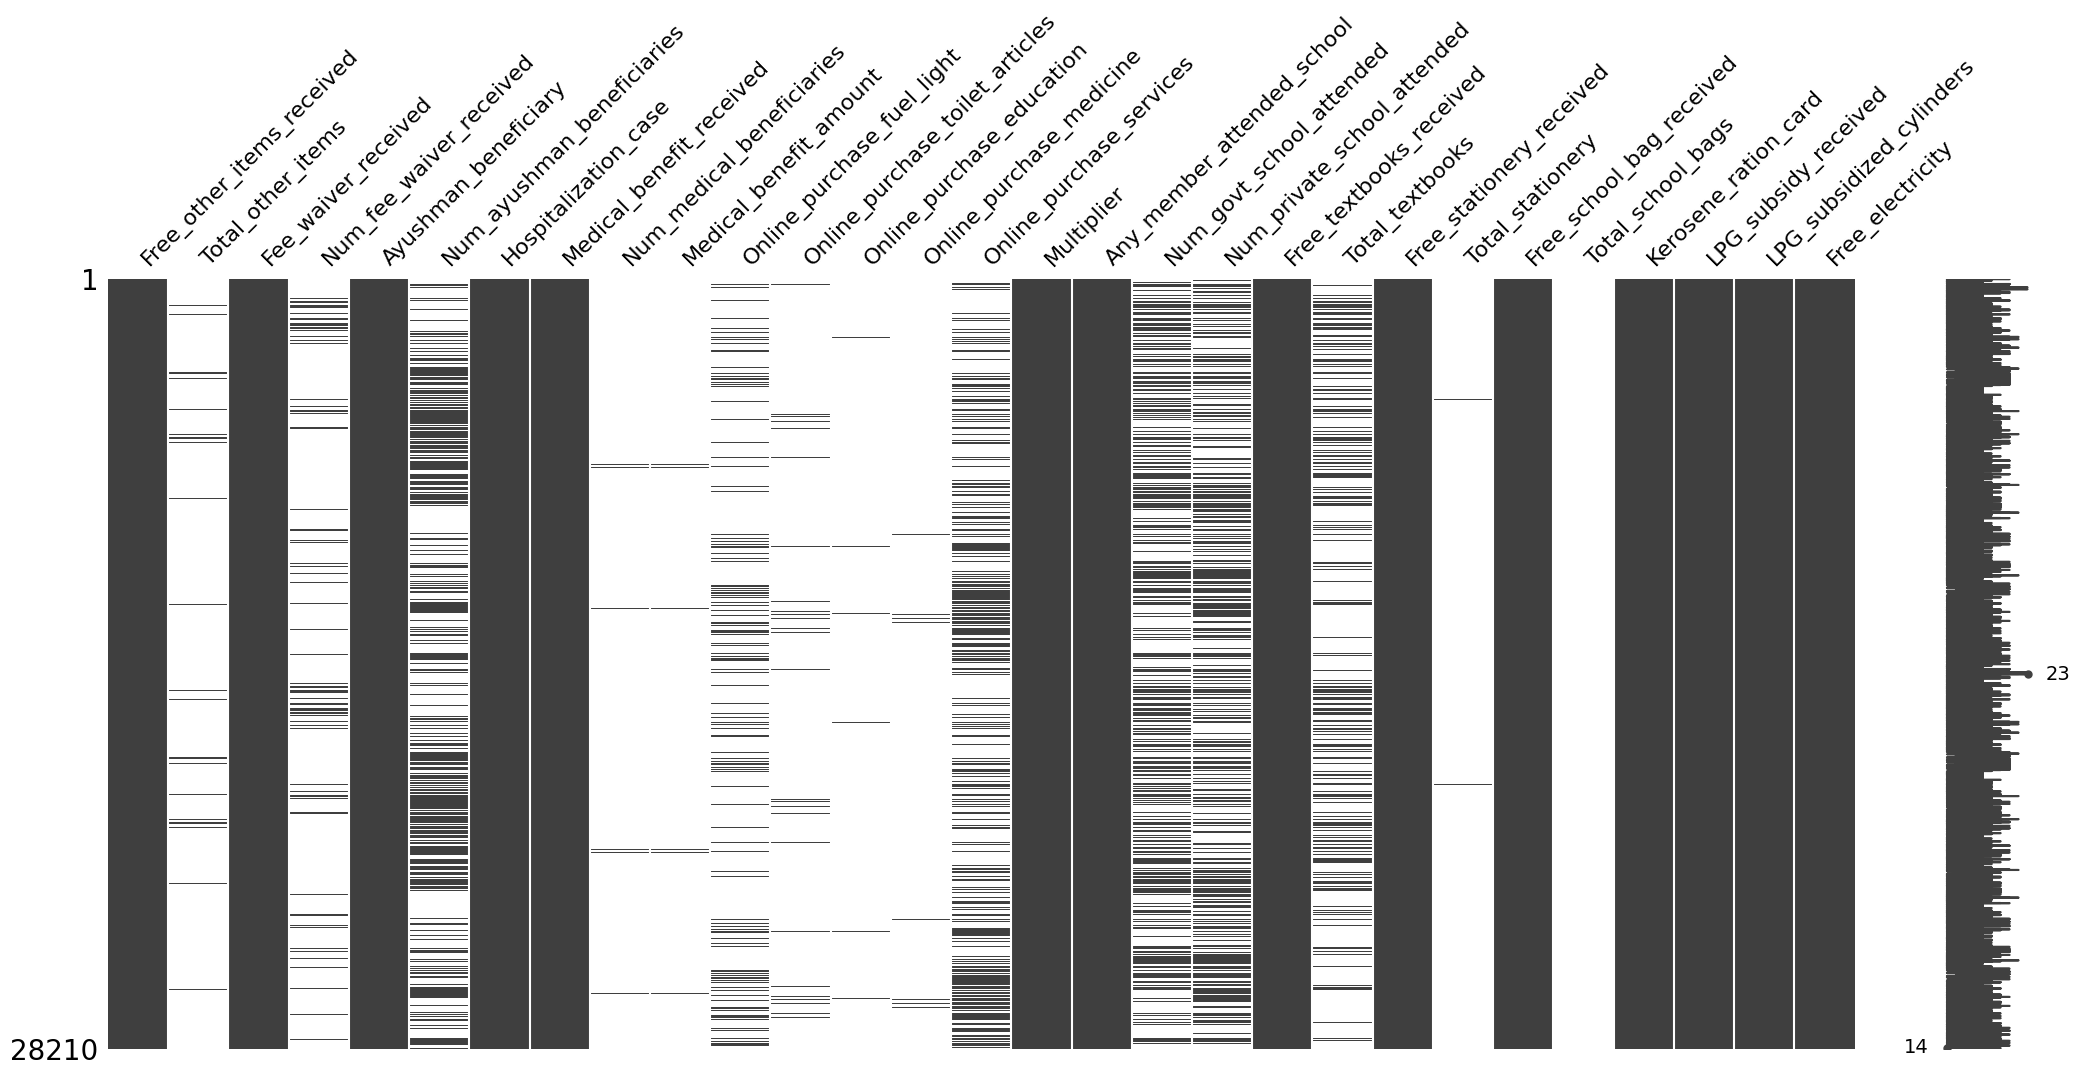

In [67]:
msgo.matrix(mp_data)

<Axes: >

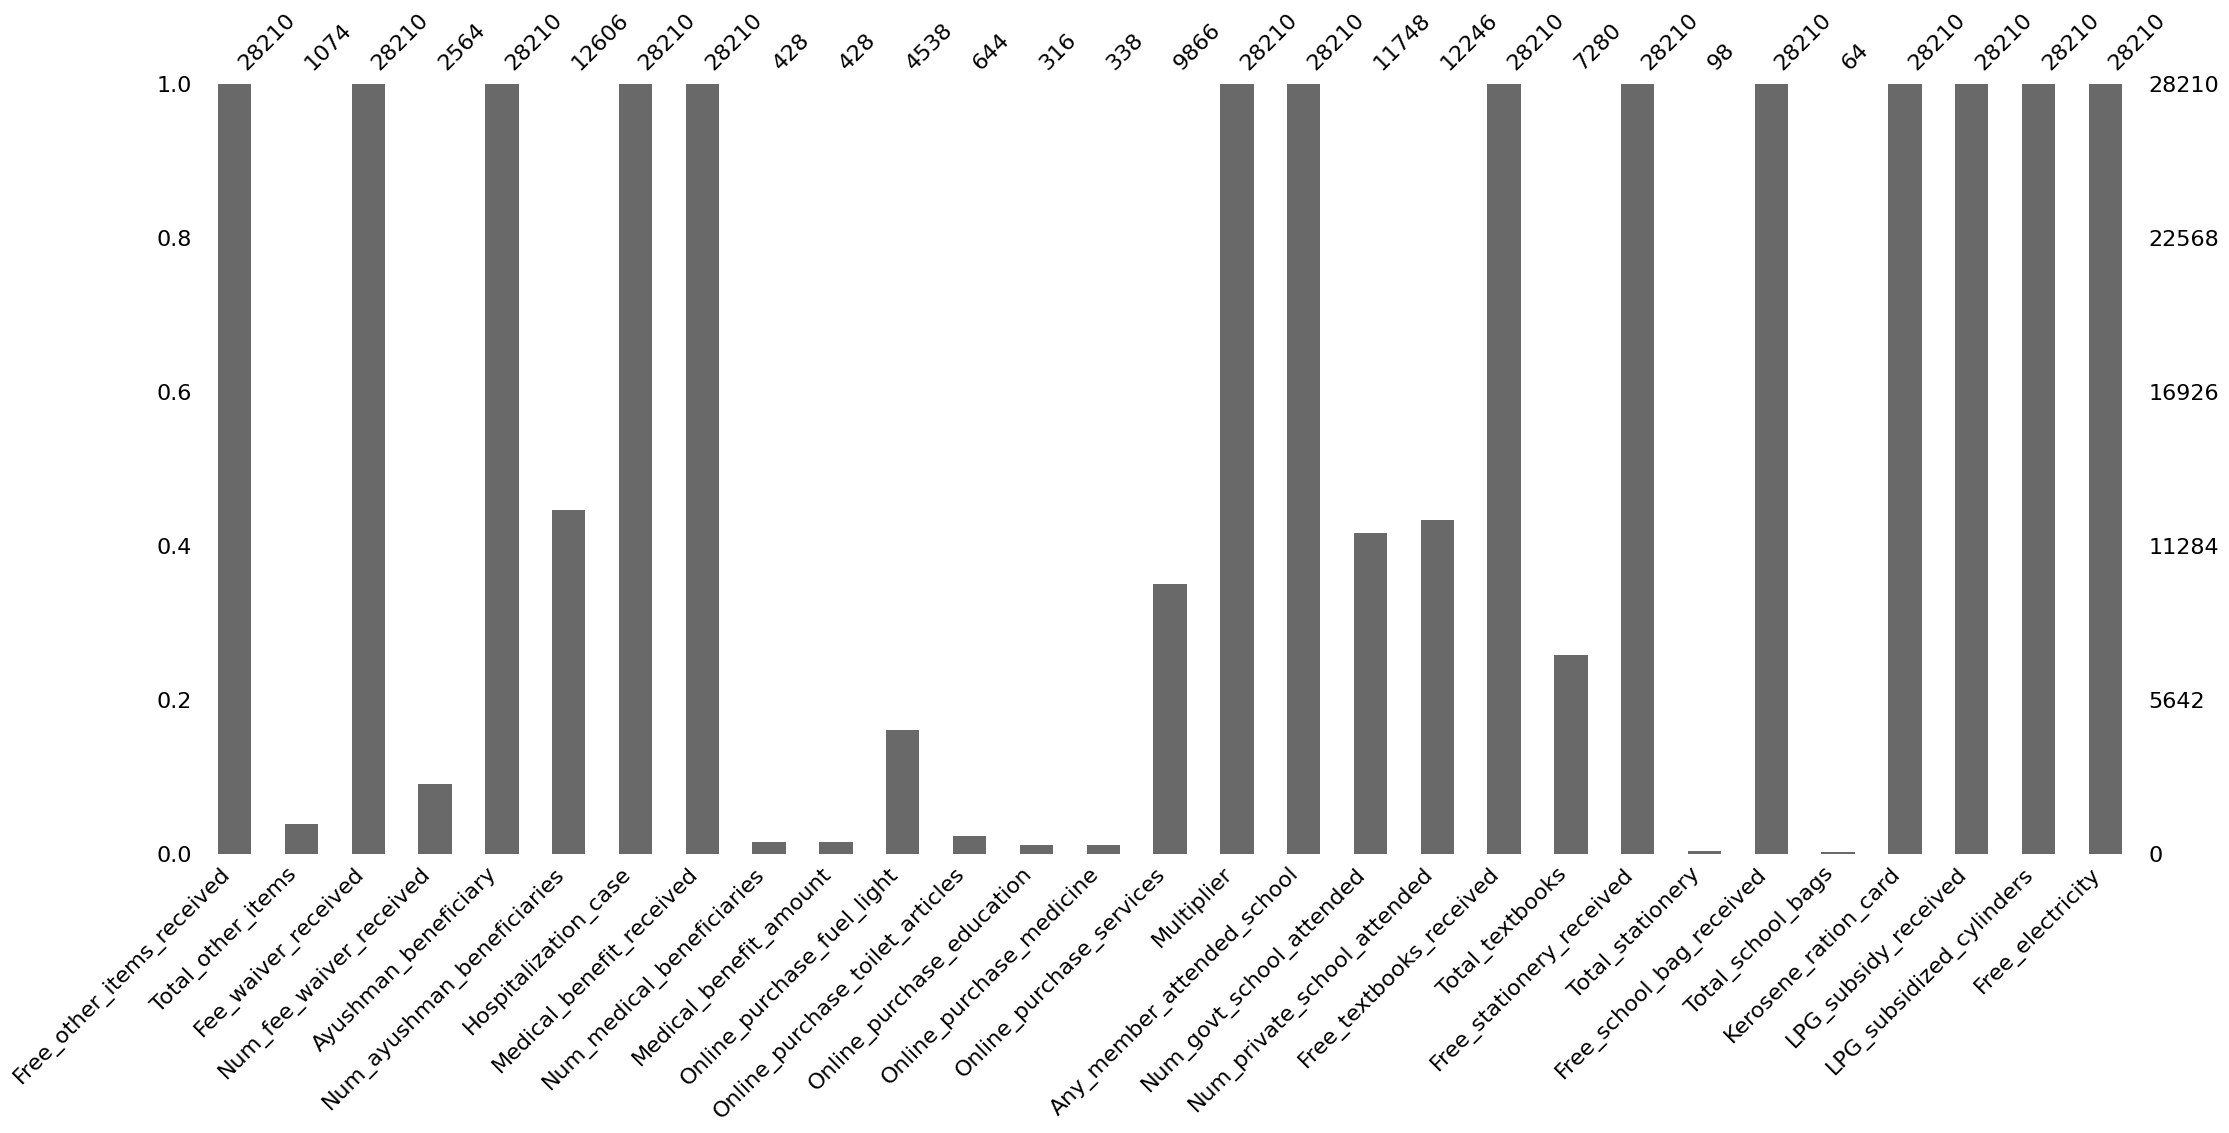

In [68]:
msgo.bar(mp_data)

# Percentage value of null

In [69]:
print("Percentage of null values ")
for col in mp_data.columns:
    null_percentage = (mp_data[col].isnull().sum() / mp_data.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")

Percentage of null values 
Free_other_items_received ---> 0.00%
Total_other_items ---> 96.19%
Fee_waiver_received ---> 0.00%
Num_fee_waiver_received ---> 90.91%
Ayushman_beneficiary ---> 0.00%
Num_ayushman_beneficiaries ---> 55.31%
Hospitalization_case ---> 0.00%
Medical_benefit_received ---> 0.00%
Num_medical_beneficiaries ---> 98.48%
Medical_benefit_amount ---> 98.48%
Online_purchase_fuel_light ---> 83.91%
Online_purchase_toilet_articles ---> 97.72%
Online_purchase_education ---> 98.88%
Online_purchase_medicine ---> 98.80%
Online_purchase_services ---> 65.03%
Multiplier ---> 0.00%
Any_member_attended_school ---> 0.00%
Num_govt_school_attended ---> 58.36%
Num_private_school_attended ---> 56.59%
Free_textbooks_received ---> 0.00%
Total_textbooks ---> 74.19%
Free_stationery_received ---> 0.00%
Total_stationery ---> 99.65%
Free_school_bag_received ---> 0.00%
Total_school_bags ---> 99.77%
Kerosene_ration_card ---> 0.00%
LPG_subsidy_received ---> 0.00%
LPG_subsidized_cylinders ---> 0.00%
F

In [70]:
print("Percentage of null values greater than the 90% \n ")
for col in mp_data.columns:
    null_percentage = (mp_data[col].isnull().sum() / mp_data.shape[0]) * 100
    if null_percentage > 90:
        print(f"{col} ---> {null_percentage:.2f}%")

Percentage of null values greater than the 90% 
 
Total_other_items ---> 96.19%
Num_fee_waiver_received ---> 90.91%
Num_medical_beneficiaries ---> 98.48%
Medical_benefit_amount ---> 98.48%
Online_purchase_toilet_articles ---> 97.72%
Online_purchase_education ---> 98.88%
Online_purchase_medicine ---> 98.80%
Total_stationery ---> 99.65%
Total_school_bags ---> 99.77%


In [72]:
mp_pdf = mp_pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in mp_pdf.columns]
)

In [74]:
mp_pdf.schema

Schema([('Free_other_items_received', Int16),
        ('Total_other_items', Int16),
        ('Fee_waiver_received', Int16),
        ('Num_fee_waiver_received', Int16),
        ('Ayushman_beneficiary', Int16),
        ('Num_ayushman_beneficiaries', Int16),
        ('Hospitalization_case', Int16),
        ('Medical_benefit_received', Int16),
        ('Num_medical_beneficiaries', Int16),
        ('Medical_benefit_amount', Int16),
        ('Online_purchase_fuel_light', Int16),
        ('Online_purchase_toilet_articles', Int16),
        ('Online_purchase_education', Int16),
        ('Online_purchase_medicine', Int16),
        ('Online_purchase_services', Int16),
        ('Multiplier', Int16),
        ('Any_member_attended_school', Int16),
        ('Num_govt_school_attended', Int16),
        ('Num_private_school_attended', Int16),
        ('Free_textbooks_received', Int16),
        ('Total_textbooks', Int16),
        ('Free_stationery_received', Int16),
        ('Total_stationery', Int16),
 

In [75]:
mp_pdf.null_count()

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received,Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount,Online_purchase_fuel_light,Online_purchase_toilet_articles,Online_purchase_education,Online_purchase_medicine,Online_purchase_services,Multiplier,Any_member_attended_school,Num_govt_school_attended,Num_private_school_attended,Free_textbooks_received,Total_textbooks,Free_stationery_received,Total_stationery,Free_school_bag_received,Total_school_bags,Kerosene_ration_card,LPG_subsidy_received,LPG_subsidized_cylinders,Free_electricity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
497048,497048,238838,490750,0,351568,0,440718,514570,516728,436390,508418,514706,514604,311884,432254,0,303760,317566,415250,415250,500866,500866,499202,499202,0,0,365286,0


In [77]:
mp_pdf = mp_pdf.fill_null(strategy='zero')

In [78]:
mp_pdf.max()

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received,Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount,Online_purchase_fuel_light,Online_purchase_toilet_articles,Online_purchase_education,Online_purchase_medicine,Online_purchase_services,Multiplier,Any_member_attended_school,Num_govt_school_attended,Num_private_school_attended,Free_textbooks_received,Total_textbooks,Free_stationery_received,Total_stationery,Free_school_bag_received,Total_school_bags,Kerosene_ration_card,LPG_subsidy_received,LPG_subsidized_cylinders,Free_electricity
i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16,i16
1,50,2,9,2,20,4,2,9,32700,1,1,1,1,1,32766,2,9,12,1,84,1,50,1,10,2,2,3,2


In [82]:
mp_pdf.estimated_size(unit='mb')

28.978870391845703

In [83]:
df = mp_pdf

In [94]:
ayshman_df = df['Ayushman_beneficiary'].value_counts()

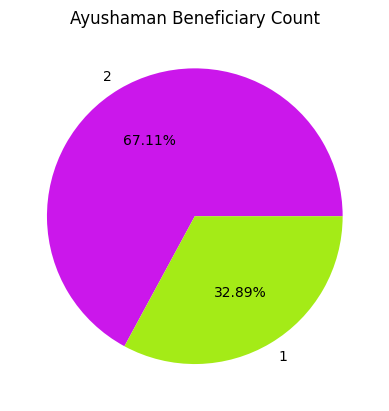

In [ ]:
plt.pie(
    data=ayshman_df, 
    x=ayshman_df['count'], 
    autopct='%1.2f%%', 
    labels=ayshman_df['Ayushman_beneficiary']
)
plt.title('Ayushaman Beneficiary Count')
plt.show()

In [ ]:
# 1-> Yes
# 2-> No

# Health

In [102]:
df[lev_07_health]

Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount
i16,i16,i16,i16,i16,i16
1,1,4,0,0,0
2,0,2,2,0,0
1,1,4,0,0,0
1,4,4,0,0,0
1,2,4,0,0,0
…,…,…,…,…,…
2,0,4,0,0,0
2,0,4,0,0,0
2,0,4,0,0,0


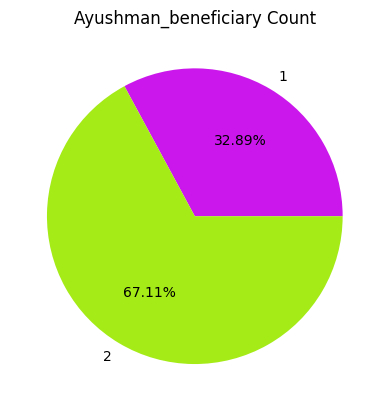

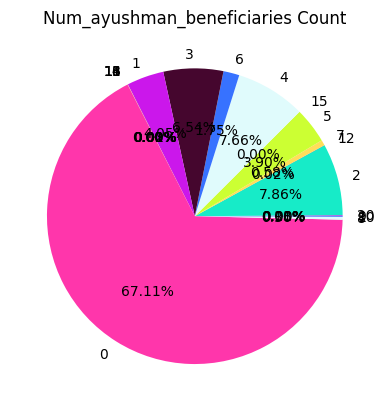

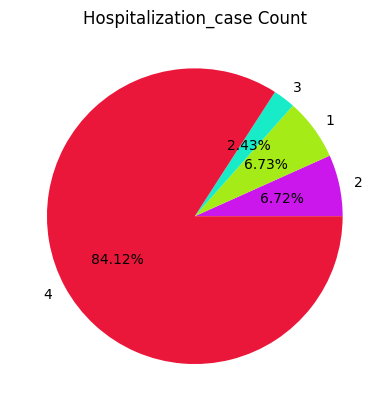

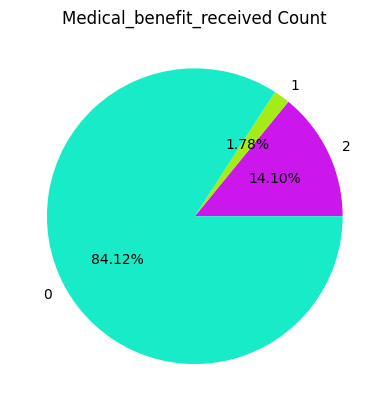

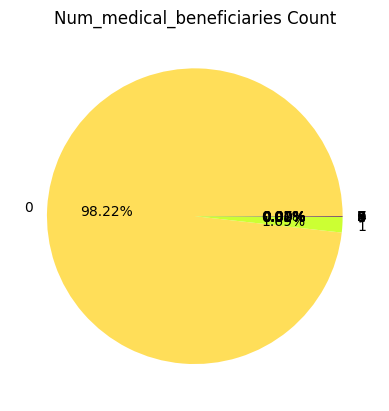

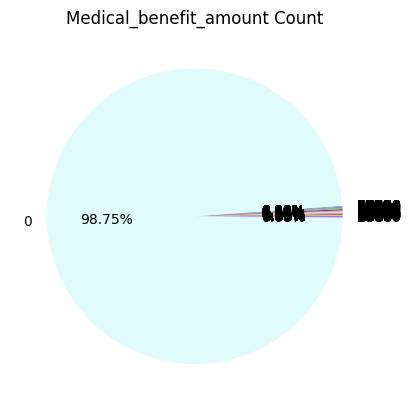

In [107]:
for col in df[lev_07_health].columns:
    pie_df = df[col].value_counts()
    
    plt.pie(
    data=pie_df, 
    x=pie_df['count'], 
    autopct='%1.2f%%', 
    labels=pie_df[col]
    )
    
    plt.title(f'{col} Count')
    plt.show()

In [ ]:
Food
Health
Digital
Occupation
Govt 